<a href="https://colab.research.google.com/github/MOHD-TAUFIQUE/Unsupervised-Learning-Notes_materials/blob/main/K_Means_Clustering_self_notes_Mohd_Taufique_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Introduction to Clustering </u></b>

### Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

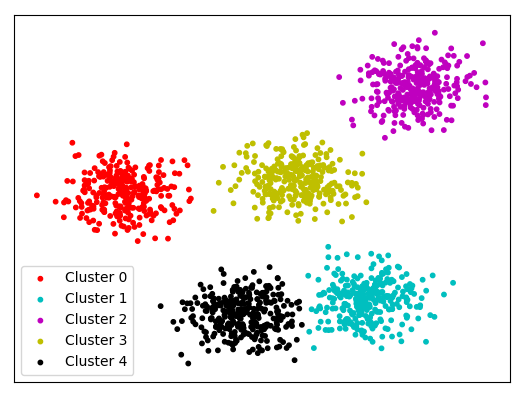

# <b><u> Introduction to k-means clustering </u></b>

### Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as *k-means clustering*, which is implemented in ``sklearn.cluster.KMeans``.

### The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- ###  The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- ### Each point is closer to its own cluster center than to other cluster centers.

### Those two assumptions are the basis of the *k*-means model.

### First, let's generate a two-dimensional dataset containing four distinct blobs.To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
import numpy as np

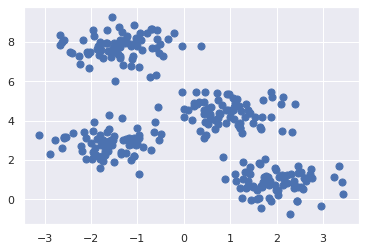

In [5]:
#from sklearn.datasets.samples_generator import make_blobs -> old version of sklearn, now it does not exists anymore
from sklearn.datasets import make_blobs #recently added in sklearn
X, y_true = make_blobs(n_samples=300, centers=4, # the value of k or centres is choosen in two ways. First -> heristically or business driven. second-> based on data points.
                       cluster_std=0.60, random_state=0) # random state is used to maintain reproducibility. It is followed by any number.
plt.scatter(X[:, 0], X[:, 1], s=50)

### By eye, it is relatively easy to pick out the four clusters.The *k*-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [8]:
'''Clusterig is of two types. 1)soft clustering:- one data points or observation can be assigned to two different clusters. 
The name itself shows it's functionality. 2) Hard Clustering:- It can never assigned any data points to two different clusters. 
It is hard in nature and restrict the observation to one single cluster only.'''

"Clusterig is of two types. 1)soft clustering:- one data points or observation can be assigned to two different clusters. \nThe name itself shows it's functionality. 2) Hard Clustering:- It can never assigned any data points to two different clusters. \nIt is hard in nature and restrict the observation to one single cluster only."

In [9]:
'''Scaling and complexity are the two curse of using KMeans. It is generally not advised to use this algo in real time 
bcoz it's calculate distance from every data point which is really cumbersome task. But it is highly used algo in doing clustering. This algo follows 
iterative steps which are mentioned as below:-
step-1. Random initiation of cluter points whcih may be from given data points or it may be different from this observation.
step-2. Compute distance of every points from these randomly selected cluter points.
step-3. find the centroid of all the clusters formed.
step-4. Again iterate the process to define more suitable clusters by finding distance of every data points from the centroid
and re assigned observation to right cluster.
step-5. The stopping criteria will be the time when there is no any movement or reassignment of any data points to any other cluster.'''

"Scaling and complexity are the two curse of using KMeans. It is generally not advised to use this algo in real time \nbcoz it's calculate distance from every data point which is really cumbersome task. But it is highly used algo in doing clustering. This algo follows \niterative steps which are mentioned as below:-\nstep-1. Random initiation of cluter points whcih may be from given data points or it may be different from this observation.\nstep-2. Compute distance of every points from these randomly selected cluter points.\nstep-3. find the centroid of all the clusters formed.\nstep-4. Again iterate the process to define more suitable clusters by finding distance of every data points from the centroid\nand re assigned observation to right cluster.\nstep-5. The stopping criteria will be the time when there is no any movement or reassignment of any data points to any other cluster."

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

### Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the *k*-means estimator:

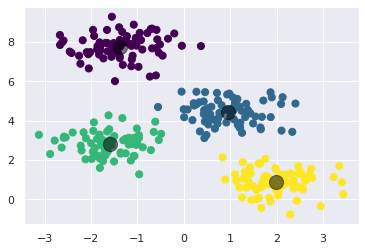

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
kmeans.cluster_centers_

array([[ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263]])

### The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly. Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive iterative approach known as *expectation–maximization*.

## <b><u> k-Means Algorithm: Expectation–Maximization </u></b>

### Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. *k*-means is a particularly simple and easy-to-understand application of the algorithm.

### In short, the expectation–maximization approach here consists of the following procedure:

1. ### Guess some cluster centers
2. ### Repeat until converged
   1. ### *E-Step*: assign points to the nearest cluster center
   2. ### *M-Step*: set the cluster centers to the mean 

### Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.

### The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers — in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

### The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.


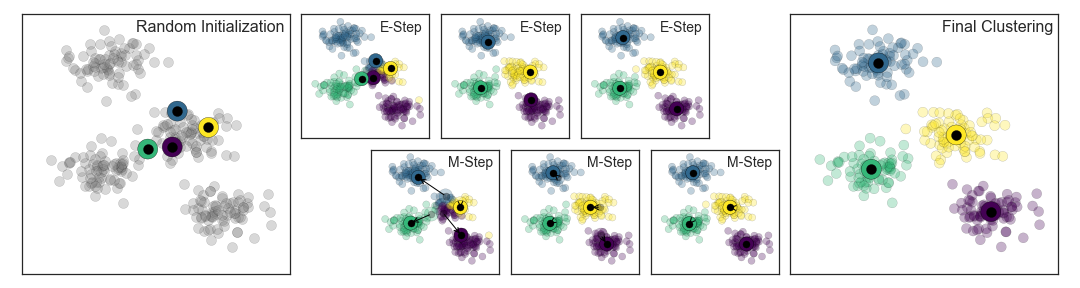

In [11]:
'''A single iteration is the combination of E & M step. The sweet spot is the end result of iterative E & M steps. The maximum iteration is 300
but required result is mostly achieved after 6-7 steps. For referances we can take sklearn KMeans.'''

'A single iteration is the combination of E & M step. The sweet spot is the end result of iterative E & M steps. The maximum iteration is 300\nbut required result is mostly achieved after 6-7 steps. For referances we can take sklearn KMeans.'

### The *k*-Means algorithm is simple enough that we can write it in a few lines of code.

[[-0.01943215  1.07001032]
 [ 0.13861369  0.89639036]
 [ 1.92892164  0.18201791]
 [ 1.62152568 -0.22328525]]
[[-0.59296375  0.68635899]
 [ 0.32786693  0.41578089]
 [ 1.9491367   0.24515351]
 [ 1.14536368 -0.27375918]]
[[-0.59296375  0.68635899]
 [ 0.32786693  0.41578089]
 [ 1.9491367   0.24515351]
 [ 1.14536368 -0.27375918]]
[[-0.64535567  0.63811176]
 [ 0.36068484  0.45355392]
 [ 1.89527482  0.12224014]
 [ 1.05627541 -0.30350485]]
[[-0.64535567  0.63811176]
 [ 0.36068484  0.45355392]
 [ 1.89527482  0.12224014]
 [ 1.05627541 -0.30350485]]
[[-0.68506301  0.61412832]
 [ 0.35186828  0.51738478]
 [ 1.86828986  0.0837172 ]
 [ 0.97561016 -0.31602629]]
[[-0.68506301  0.61412832]
 [ 0.35186828  0.51738478]
 [ 1.86828986  0.0837172 ]
 [ 0.97561016 -0.31602629]]
[[-0.68506301  0.61412832]
 [ 0.35403606  0.54973022]
 [ 1.83207253  0.0305805 ]
 [ 0.89274198 -0.30682581]]
[[-0.68506301  0.61412832]
 [ 0.35403606  0.54973022]
 [ 1.83207253  0.0305805 ]
 [ 0.89274198 -0.30682581]]
[[-0.68506301  0.61

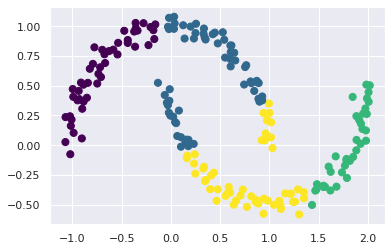

In [22]:
from sklearn.metrics import pairwise_distances_argmin
''' It is used to calculate the distance of every data points from each cluster centroid
  and finally assigned this to that cluster which has least distance.'''

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    print(centers)
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        print(new_centers)
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        print(centers)
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

## <b> Caveats of expectation–maximization </b>

### There are a few issues to be aware of when using the expectation–maximization algorithm.

## **1.** <b><u> The globally optimal result may not be achieved. </u></b> First, although    the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution. For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results:

[[1.07627418 4.68480619]
 [2.47019077 1.31451315]
 [1.24258802 4.50399192]
 [2.5270643  0.6178122 ]]
[[-1.02053394  5.33759029]
 [ 1.85843325  1.34057553]
 [ 0.81594697  3.67185725]
 [ 2.02488729  0.42951967]]
[[-1.02053394  5.33759029]
 [ 1.85843325  1.34057553]
 [ 0.81594697  3.67185725]
 [ 2.02488729  0.42951967]]
[[-1.45749135  6.32442404]
 [ 1.85419761  1.32808994]
 [ 0.13572612  3.68769178]
 [ 2.03350329  0.4180301 ]]
[[-1.45749135  6.32442404]
 [ 1.85419761  1.32808994]
 [ 0.13572612  3.68769178]
 [ 2.03350329  0.4180301 ]]
[[-1.35579987  7.72369613]
 [ 1.94101864  1.38485552]
 [-0.33709008  3.61375477]
 [ 2.03350329  0.4180301 ]]
[[-1.35579987  7.72369613]
 [ 1.94101864  1.38485552]
 [-0.33709008  3.61375477]
 [ 2.03350329  0.4180301 ]]
[[-1.37324398  7.75368871]
 [ 1.96248697  1.44113424]
 [-0.35164179  3.62712721]
 [ 2.01581585  0.41580395]]
[[-1.37324398  7.75368871]
 [ 1.96248697  1.44113424]
 [-0.35164179  3.62712721]
 [ 2.01581585  0.41580395]]
[[-1.37324398  7.75368871]


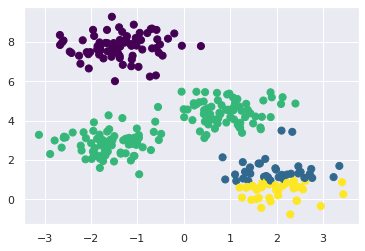

In [13]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

### Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the ``n_init`` parameter, which defaults to 10).

## **2.** <b><u>The number of clusters must be selected beforehand.</u></b> Another common challenge with *k*-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters.

In [14]:
# It is parametric and so the assumption is to define the number of cluster beforehand.

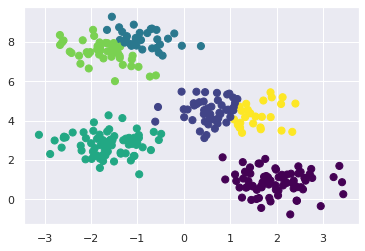

In [15]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

## <b><u> Selecting the number of clusters with silhouette analysis on KMeans clustering </u></b>

### Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

### Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [23]:
'''Elbow method:- It is used to select optimal number of clusters. It has total within sum of square on y axis and number of cluster on x-axis
and then we look out for that k value which divide this curve which visually look like elbow. This points divides entire graph into 2 parts.'''

'Elbow method:- It is used to select optimal number of clusters. It has total within sum of square on y axis and number of cluster on x-axis\nand then we look out for that k value which divide this curve which visually look like elbow. This points divides entire graph into 2 parts.'

In [26]:
"""Higher the value of sillhoette score, the optimal is the value of k for the given data sets. Sillhouette score technique is better to
Elbow method bcoz it contains more information and basically it seperates the distance between the clusters. RFM is topic we shd study from our end."""

'Higher the value of sillhoette score, the optimal is the value of k for the given data sets. Sillhouette score technique is better to\nElbow method bcoz it contains more information and basically it seperates the distance between the clusters. RFM is topic we shd study from our end.'

 It is used to calculate the distance of every data points from each cluster centroid
  and finally assigned this to that cluster which has least distance.
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


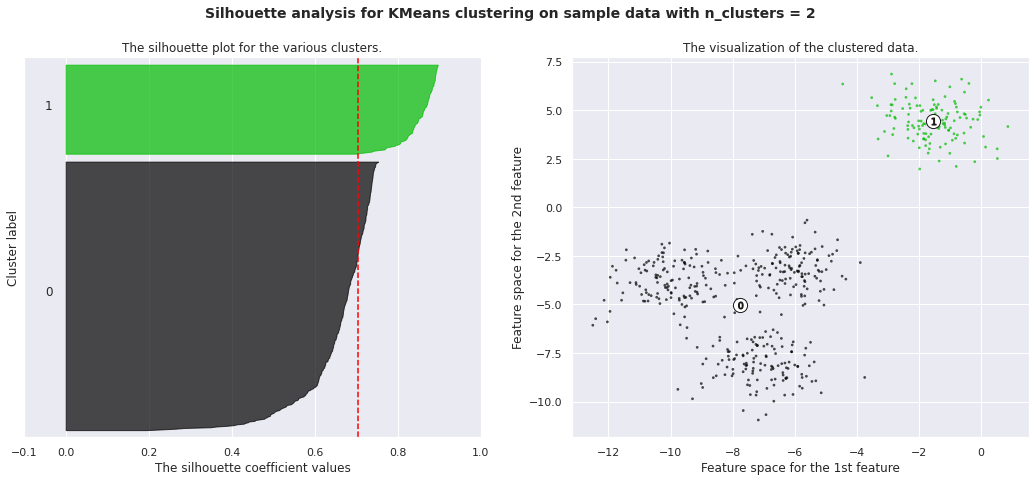

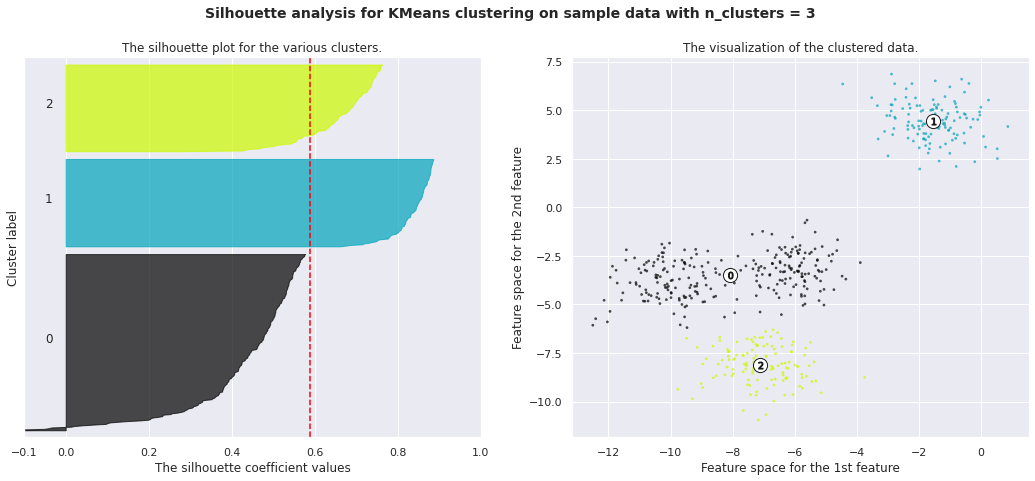

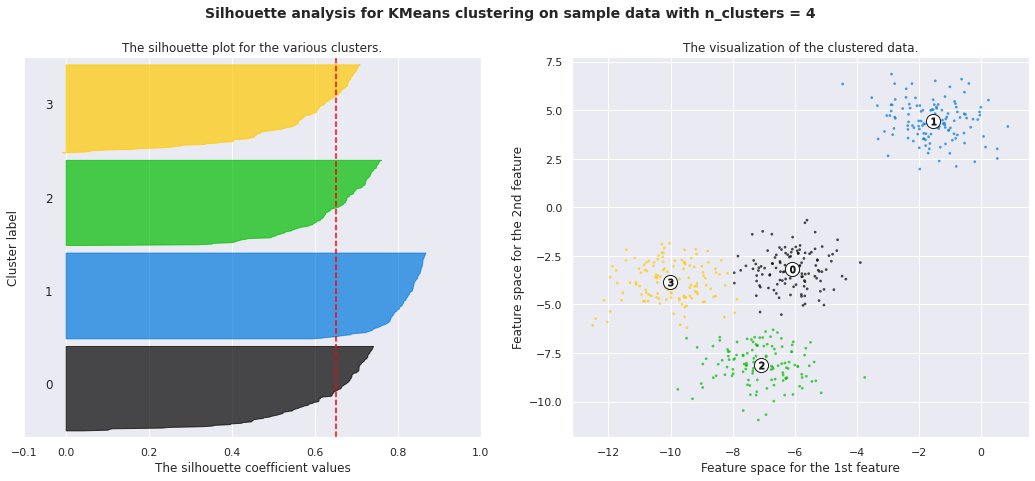

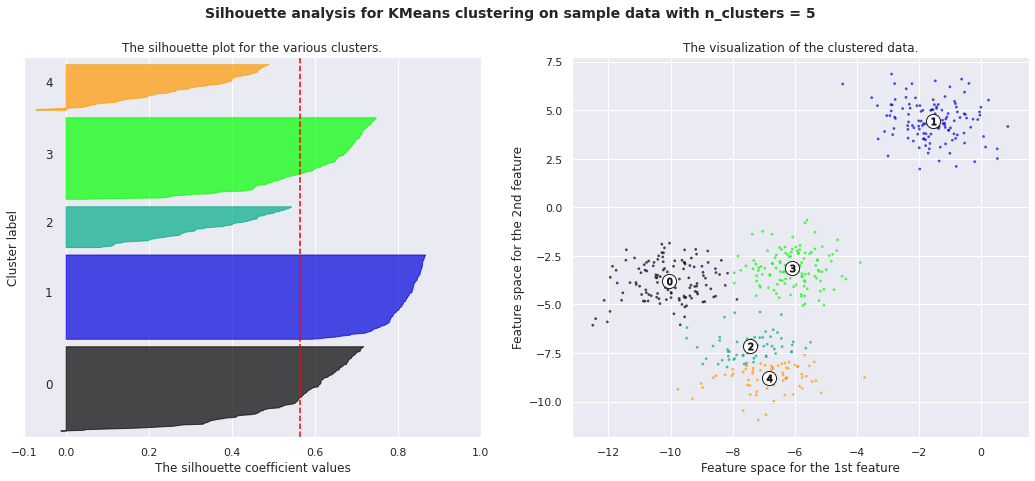

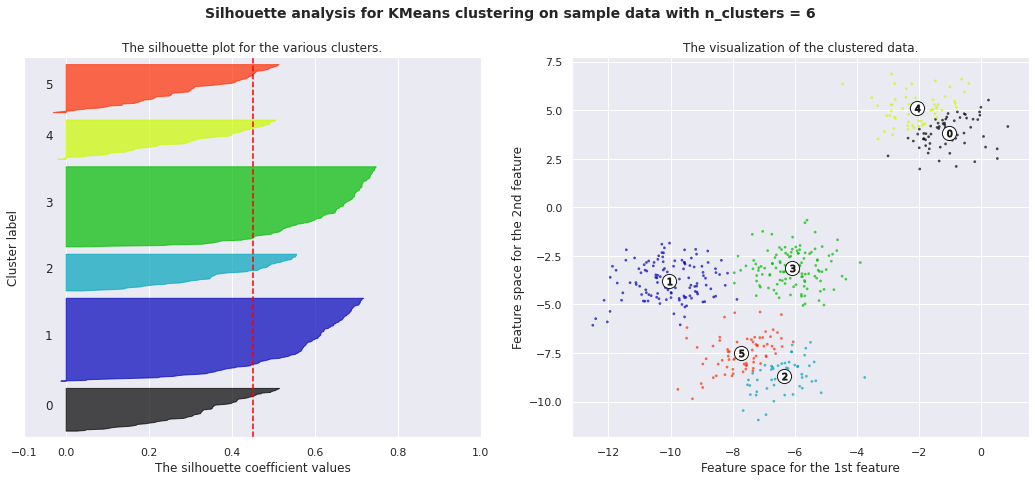

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## <b> Calculation of Silhouette score </b>

### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

## <b> 3. k-means is limited to linear cluster boundaries </b>. 

### The fundamental model assumptions of *k*-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.In particular, the boundaries between *k*-means clusters will always be linear, which means that it will fail for more complicated boundaries.Consider the following data, along with the cluster labels found by the typical *k*-means approach:

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

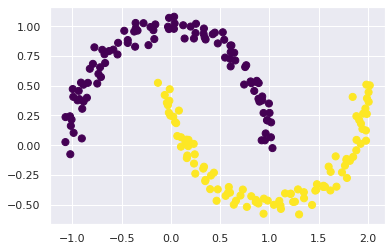

In [17]:
plt.scatter(X[:, 0], X[:, 1],c=y,s=50, cmap='viridis')

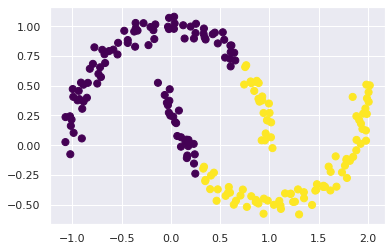

In [18]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

### This situation is reminiscent of the discussion in Support Vector Machines, where we used a kernel transformation to project the data into a higher dimension where a linear separation is possible.We might imagine using the same trick to allow *k*-means to discover non-linear boundaries.One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


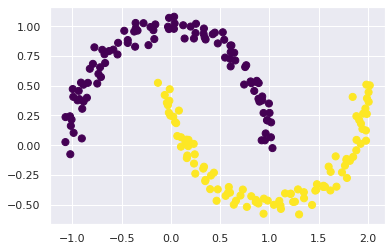

In [19]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

### We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

## <b> 4. k-means can be slow for large numbers of samples </b>

### Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows. You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step. This is the idea behind batch-based k-means algorithms, one form of which is implemented in sklearn.cluster.MiniBatchKMeans. The interface for this is the same as for standard KMeans; we will see an example of its use as we continue our discussion.

In [27]:
'''There are also other way of computing distance. 1) Median & L1 Norm cobinely aka(also known as) K-Median.
2) Medioid:- This technique select only those points as cluster which are from data points only during Random initiasation step.
3) MiniBatchK means:- It is tough to compute distance from every points if the number of are data points is huge. It basically 
divide the data points into small batch and then find cluster and calculate distance from this cluter point.''' 

'There are also other way of computing distance. 1) Median & L1 Norm cobinely aka(also known as) K-Median.\n2) Medioid:- This technique select only those points as cluster which are from data points only during Random initiasation step.\n3) MiniBatchK means:- It is tough to compute distance from every points if the number of are data points is huge. It basically \ndivide the data points into small batch and then find cluster and calculate distance from this cluter point.'

In [20]:
# K Means and KNN is very confusing. Both these algo uses distance as metric but KNN is supervised ML which can be used for both regression and
# Classification technique while KMeans is unsupervised ML mainly used for clustering.